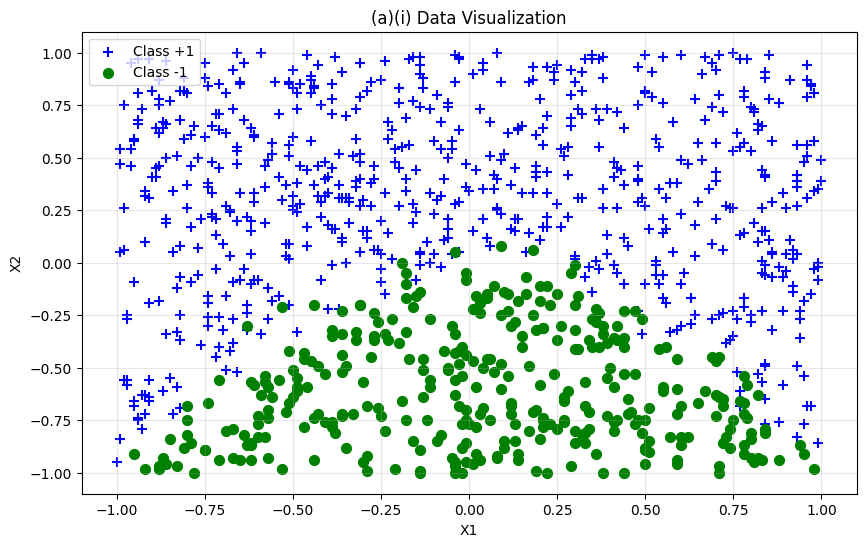

Logistic Regression Model Parameters:
Model: h(x) = sign(1.7617 + -0.2828*x1 + 4.9906*x2)
Weights: w1=-0.2828, w2=4.9906
Bias: 1.7617

Feature Influence:
X1 has negative influence: Higher X1 values tend to predict class -1
X2 has positive influence: Higher X2 values tend to predict class +1
Most influential feature: X2


/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sayanide/Uni/Machine Learning/.venv/lib/pyt

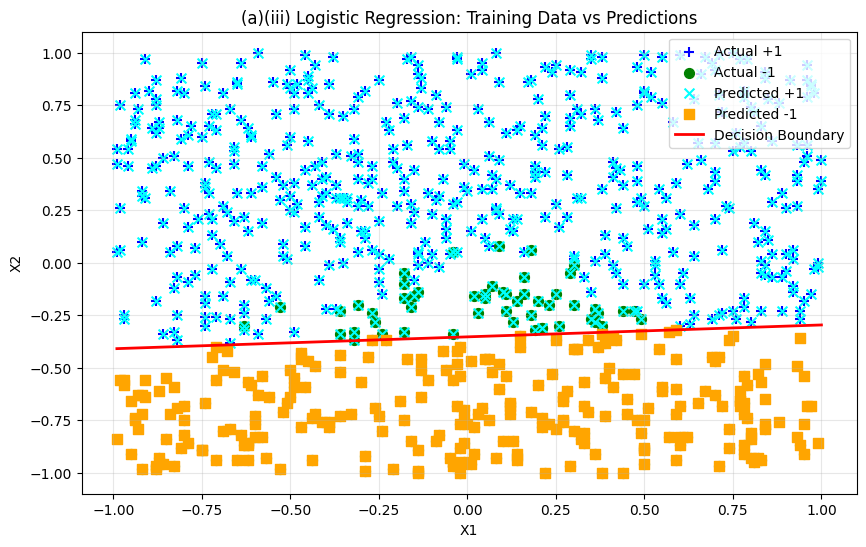


Training Accuracy: 0.8786
Misclassified points: 97/799


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("week2.csv", skiprows=1, header=None)
df.columns = ["X1", "X2", "y"]

# Extract features and target
X1 = df["X1"].values
X2 = df["X2"].values
y = df["y"].values
X = np.column_stack((X1, X2))

# (a)(i) Data visualization
plt.figure(figsize=(10, 6))
plt.scatter(X1[y==1], X2[y==1], marker='+', color='blue', s=50, label="Class +1")
plt.scatter(X1[y==-1], X2[y==-1], marker='o', color='green', s=50, label="Class -1")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("(a)(i) Data Visualization")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("figures/data_scatter.png", dpi=200, bbox_inches="tight")
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (a)(ii) Train logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Extract parameters
w1, w2 = logistic_model.coef_[0]
b = logistic_model.intercept_[0]

print(f"Logistic Regression Model Parameters:")
print(f"Model: h(x) = sign({b:.4f} + {w1:.4f}*x1 + {w2:.4f}*x2)")
print(f"Weights: w1={w1:.4f}, w2={w2:.4f}")
print(f"Bias: {b:.4f}")

# Feature influence analysis
print(f"\nFeature Influence:")
if w1 > 0:
    print(f"X1 has positive influence: Higher X1 values tend to predict class +1")
else:
    print(f"X1 has negative influence: Higher X1 values tend to predict class -1")

if w2 > 0:
    print(f"X2 has positive influence: Higher X2 values tend to predict class +1")
else:
    print(f"X2 has negative influence: Higher X2 values tend to predict class -1")

print(f"Most influential feature: {'X1' if abs(w1) > abs(w2) else 'X2'}")

# (a)(iii) Predictions on training data
y_pred_train = logistic_model.predict(X_train)

plt.figure(figsize=(10, 6))
# Plot actual training data
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], 
           marker='+', color='blue', s=50, label="Actual +1")
plt.scatter(X_train[y_train==-1][:,0], X_train[y_train==-1][:,1], 
           marker='o', color='green', s=50, label="Actual -1")

# Plot predictions
plt.scatter(X_train[y_pred_train==1][:,0], X_train[y_pred_train==1][:,1], 
           marker='x', color='cyan', s=50, label="Predicted +1")
plt.scatter(X_train[y_pred_train==-1][:,0], X_train[y_pred_train==-1][:,1], 
           marker='s', color='orange', s=50, label="Predicted -1")

# Decision boundary: w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
x_min, x_max = X_train[:,0].min(), X_train[:,0].max()
y_min_boundary = -(w1*x_min + b)/w2
y_max_boundary = -(w1*x_max + b)/w2

plt.plot([x_min, x_max], [y_min_boundary, y_max_boundary], 
         color='red', linewidth=2, label="Decision Boundary")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("(a)(iii) Logistic Regression: Training Data vs Predictions")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("figures/logistic_boundary.png", dpi=200, bbox_inches="tight")
plt.show()

# (a)(iv) Training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Misclassified points: {np.sum(y_train != y_pred_train)}/{len(y_train)}")

(b)(i) SVM Models with Different C Values:

C = 0.001:
  Model: h(x) = sign(0.2110 + -0.0252*x1 + 0.4169*x2)
  Weights: w1=-0.0252, w2=0.4169
  Bias: 0.2110

C = 1:
  Model: h(x) = sign(0.6348 + -0.0877*x1 + 1.8448*x2)
  Weights: w1=-0.0877, w2=1.8448
  Bias: 0.6348

C = 100:
  Model: h(x) = sign(0.6448 + -0.0893*x1 + 1.8702*x2)
  Weights: w1=-0.0893, w2=1.8702
  Bias: 0.6448


/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


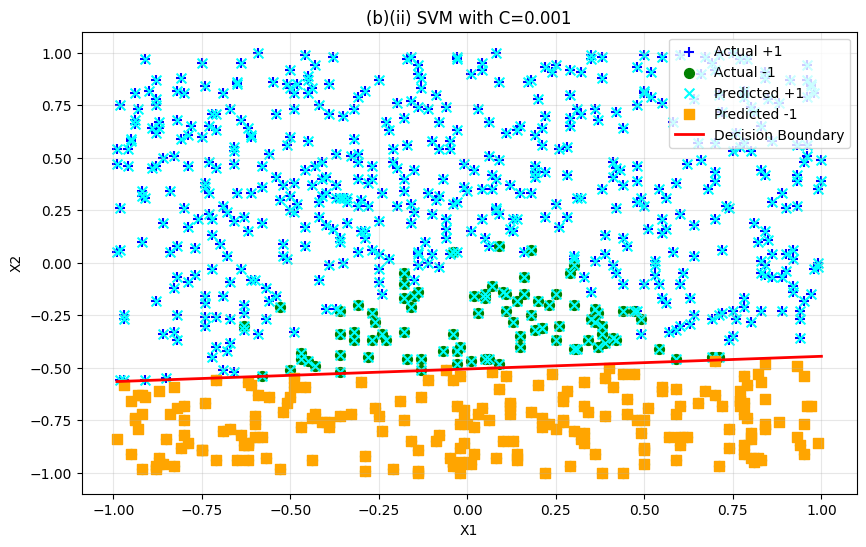

/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


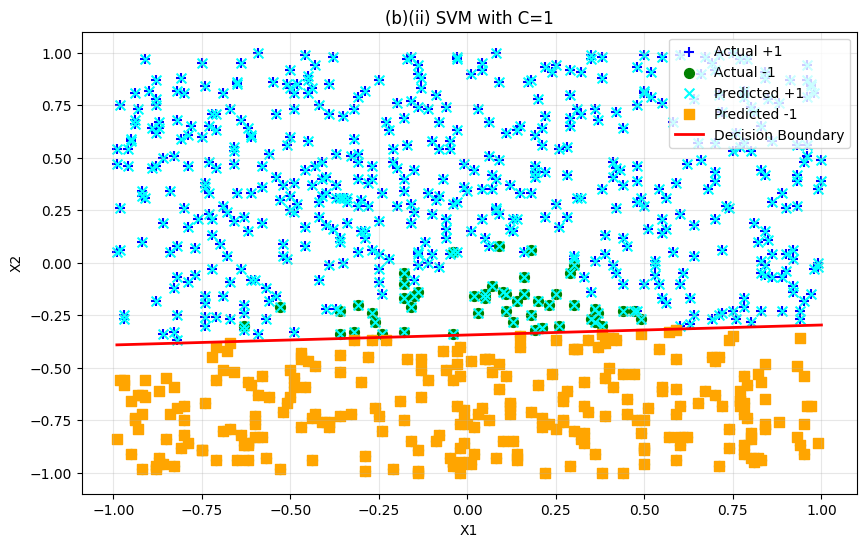

/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


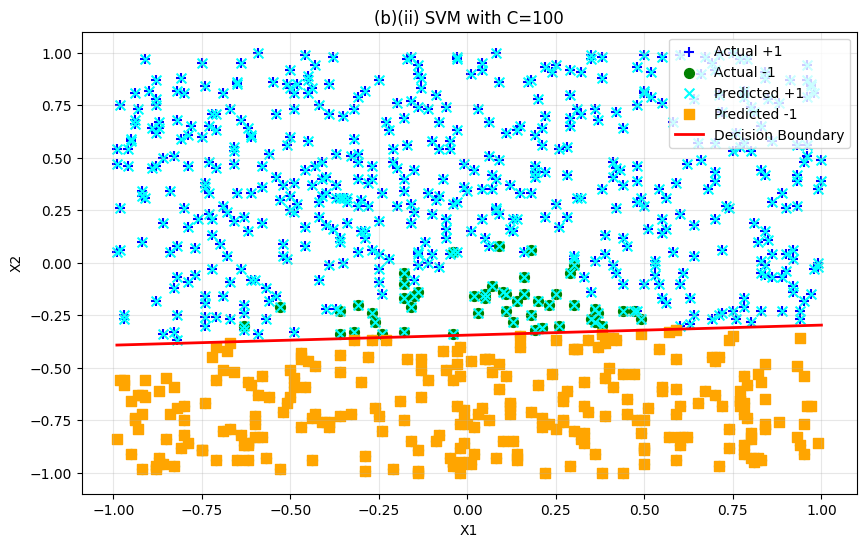


(b)(iii) Impact of C Parameter:

C = 0.001:
  Weight magnitude: 0.4177
  Approximate margin: 2.3941

C = 1:
  Weight magnitude: 1.8469
  Approximate margin: 0.5415

C = 100:
  Weight magnitude: 1.8723
  Approximate margin: 0.5341

(b)(iv) SVM vs Logistic Regression Comparison:

Logistic Regression:
  Weights: w1=-0.2828, w2=4.9906, bias=1.7617
  Training accuracy: 0.8786

SVM (C=1):
  Weights: w1=-0.0877, w2=1.8448, bias=0.6348
  Training accuracy: 0.8786


/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# (b)(i) Train SVM with different C values
C_values = [0.001, 1, 100]
svm_models = {}

print("(b)(i) SVM Models with Different C Values:")
for C in C_values:
    model = LinearSVC(C=C, max_iter=10000)
    model.fit(X_train, y_train)
    svm_models[C] = model
    
    w1_svm, w2_svm = model.coef_[0]
    b_svm = model.intercept_[0]
    
    print(f"\nC = {C}:")
    print(f"  Model: h(x) = sign({b_svm:.4f} + {w1_svm:.4f}*x1 + {w2_svm:.4f}*x2)")
    print(f"  Weights: w1={w1_svm:.4f}, w2={w2_svm:.4f}")
    print(f"  Bias: {b_svm:.4f}")

# (b)(ii) Plot SVM results
for C, model in svm_models.items():
    y_pred_svm = model.predict(X_train)
    w1_svm, w2_svm = model.coef_[0]
    b_svm = model.intercept_[0]
    
    plt.figure(figsize=(10, 6))
    
    # Plot actual data
    plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], 
               marker='+', color='blue', s=50, label="Actual +1")
    plt.scatter(X_train[y_train==-1][:,0], X_train[y_train==-1][:,1], 
               marker='o', color='green', s=50, label="Actual -1")
    
    # Plot predictions
    plt.scatter(X_train[y_pred_svm==1][:,0], X_train[y_pred_svm==1][:,1], 
               marker='x', color='cyan', s=50, label="Predicted +1")
    plt.scatter(X_train[y_pred_svm==-1][:,0], X_train[y_pred_svm==-1][:,1], 
               marker='s', color='orange', s=50, label="Predicted -1")
    
    # Decision boundary
    x_min, x_max = X_train[:,0].min(), X_train[:,0].max()
    y_min_boundary = -(w1_svm*x_min + b_svm)/w2_svm
    y_max_boundary = -(w1_svm*x_max + b_svm)/w2_svm
    
    plt.plot([x_min, x_max], [y_min_boundary, y_max_boundary], 
             color='red', linewidth=2, label="Decision Boundary")
    
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(f"(b)(ii) SVM with C={C}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig(f"figures/svm_c_{C}.png", dpi=200, bbox_inches="tight")
    plt.show()

# (b)(iii) Impact of C parameter analysis
print(f"\n(b)(iii) Impact of C Parameter:")
for C, model in svm_models.items():
    w1_svm, w2_svm = model.coef_[0]
    b_svm = model.intercept_[0]
    weight_magnitude = np.sqrt(w1_svm**2 + w2_svm**2)
    margin = 1 / weight_magnitude
    print(f"\nC = {C}:")
    print(f"  Weight magnitude: {weight_magnitude:.4f}")
    print(f"  Approximate margin: {margin:.4f}")

# (b)(iv) SVM vs Logistic Regression comparison
print(f"\n(b)(iv) SVM vs Logistic Regression Comparison:")
print(f"\nLogistic Regression:")
print(f"  Weights: w1={w1:.4f}, w2={w2:.4f}, bias={b:.4f}")
print(f"  Training accuracy: {train_accuracy:.4f}")

print(f"\nSVM (C=1):")
svm_model_c1 = svm_models[1]
w1_svm, w2_svm = svm_model_c1.coef_[0]
b_svm = svm_model_c1.intercept_[0]
svm_accuracy = accuracy_score(y_train, svm_model_c1.predict(X_train))
print(f"  Weights: w1={w1_svm:.4f}, w2={w2_svm:.4f}, bias={b_svm:.4f}")
print(f"  Training accuracy: {svm_accuracy:.4f}")

(c)(i) Extended Feature Set:
Original features: X1, X2
New features: X1², X2²
Total features: 4
Extended feature matrix shape: (999, 4)

Polynomial Logistic Regression Model:
h(x) = sign(0.4174 + -0.3720*x1 + 6.8509*x2 + 6.6088*x1² + -1.1069*x2²)
Coefficients: w1=-0.3720, w2=6.8509, w3=6.6088, w4=-1.1069
Bias: 0.4174


/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sayanide/Uni/Machine Learning/.venv/lib/pyt

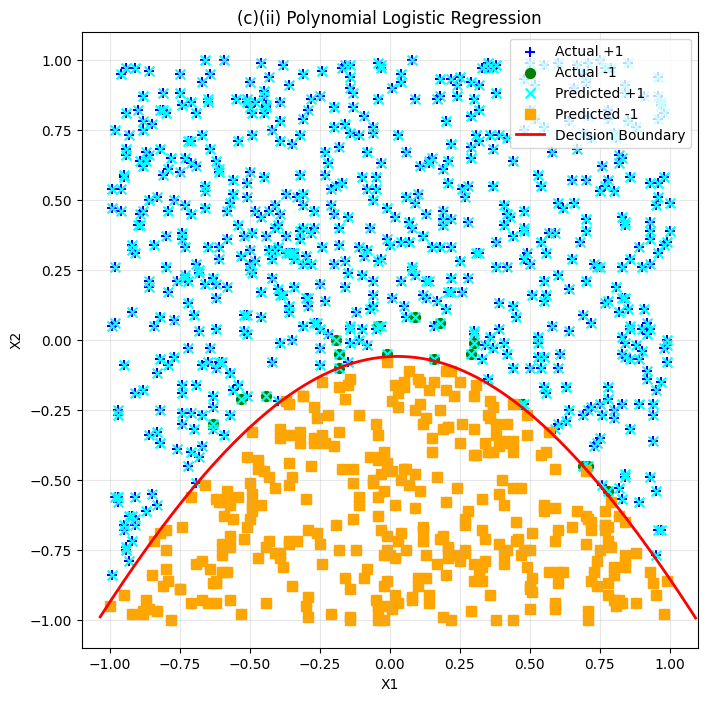


Training Accuracy: 0.9660
Comparison with linear models:
  Linear Logistic Regression: 0.8786
  Linear SVM: 0.8786
  Polynomial Logistic Regression: 0.9660

(c)(iii) Baseline Comparison:
Baseline (always predict most common class): 0.6557
Polynomial Logistic Regression: 0.9660
Improvement over baseline: 0.3103 (47.3%)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# (c)(i) Create polynomial features
X1_squared = X1**2
X2_squared = X2**2
X_extended = np.column_stack((X1, X2, X1_squared, X2_squared))

print("(c)(i) Extended Feature Set:")
print("Original features: X1, X2")
print("New features: X1², X2²")
print("Total features: 4")
print(f"Extended feature matrix shape: {X_extended.shape}")

# Train logistic regression with extended features
poly_model = LogisticRegression()
poly_model.fit(X_extended, y)

# Extract parameters
w1_poly, w2_poly, w3_poly, w4_poly = poly_model.coef_[0]
b_poly = poly_model.intercept_[0]

print(f"\nPolynomial Logistic Regression Model:")
print(f"h(x) = sign({b_poly:.4f} + {w1_poly:.4f}*x1 + {w2_poly:.4f}*x2 + {w3_poly:.4f}*x1² + {w4_poly:.4f}*x2²)")
print(f"Coefficients: w1={w1_poly:.4f}, w2={w2_poly:.4f}, w3={w3_poly:.4f}, w4={w4_poly:.4f}")
print(f"Bias: {b_poly:.4f}")

# (c)(ii) Predictions and comparison
y_pred_poly = poly_model.predict(X_extended)
poly_accuracy = accuracy_score(y, y_pred_poly)

plt.figure(figsize=(10, 6))
# Plot actual data
plt.scatter(X1[y==1], X2[y==1], marker='+', color='blue', s=50, label="Actual +1")
plt.scatter(X1[y==-1], X2[y==-1], marker='o', color='green', s=50, label="Actual -1")

# Plot predictions
plt.scatter(X1[y_pred_poly==1], X2[y_pred_poly==1], marker='x', color='cyan', s=50, label="Predicted +1")
plt.scatter(X1[y_pred_poly==-1], X2[y_pred_poly==-1], marker='s', color='orange', s=50, label="Predicted -1")

# Quadratic decision boundary
x_vals = np.linspace(-1, 1, 300)
y_boundary_pos = []
y_boundary_neg = []

for x in x_vals:
    # Quadratic equation: w2*x2 + w4*x2² + w1*x1 + w3*x1² + b = 0
    A = w4_poly
    B = w2_poly
    C = w1_poly*x + w3_poly*x**2 + b_poly
    
    discriminant = B**2 - 4*A*C
    if discriminant >= 0:
        sqrt_disc = np.sqrt(discriminant)
        y_boundary_pos.append((-B + sqrt_disc)/(2*A))
        y_boundary_neg.append((-B - sqrt_disc)/(2*A))
    else:
        y_boundary_pos.append(np.nan)
        y_boundary_neg.append(np.nan)

# Filter boundaries to be within the plot range
y_boundary_pos = [y if -1 <= y <= 1 else np.nan for y in y_boundary_pos]
y_boundary_neg = [y if -1 <= y <= 1 else np.nan for y in y_boundary_neg]

# Plot decision boundary
plt.plot(x_vals, y_boundary_pos, color='red', linewidth=2, label="Decision Boundary")
plt.plot(x_vals, y_boundary_neg, color='red', linewidth=2)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("(c)(ii) Polynomial Logistic Regression")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nTraining Accuracy: {poly_accuracy:.4f}")
print(f"Comparison with linear models:")
print(f"  Linear Logistic Regression: {train_accuracy:.4f}")
print(f"  Linear SVM: {svm_accuracy:.4f}")
print(f"  Polynomial Logistic Regression: {poly_accuracy:.4f}")

# (c)(iii) Baseline comparison
most_common_class = np.bincount(y + 1).argmax() - 1  # Convert -1,1 to 0,2 then back
baseline_accuracy = np.mean(y == most_common_class)

print(f"\n(c)(iii) Baseline Comparison:")
print(f"Baseline (always predict most common class): {baseline_accuracy:.4f}")
print(f"Polynomial Logistic Regression: {poly_accuracy:.4f}")
print(f"Improvement over baseline: {poly_accuracy - baseline_accuracy:.4f} ({((poly_accuracy - baseline_accuracy)/baseline_accuracy)*100:.1f}%)")

Intercept: [0.4173898]
Coefficients: [[-0.37199918  6.85094903  6.60884332 -1.10686469]]


/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sayanide/Uni/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sayanide/Uni/Machine Learning/.venv/lib/pyt

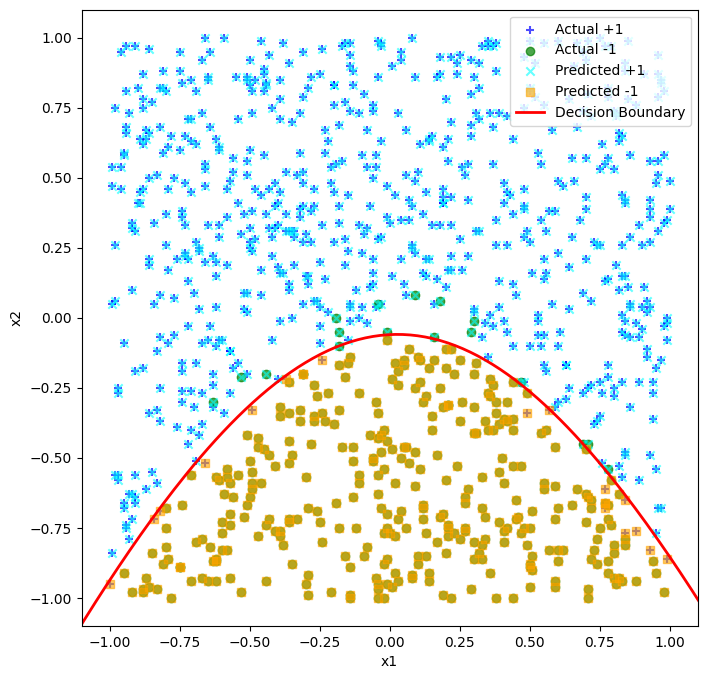

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load data
df = pd.read_csv("week2.csv", skiprows=1, header=None)
df.columns = ["X1", "X2", "y"]

X1 = df["X1"].values
X2 = df["X2"].values
y  = df["y"].values

# Add squared features
X = np.column_stack((X1, X2, X1**2, X2**2))

# Train logistic regression
model = LogisticRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Predictions
y_pred = model.predict(X)

# Plot actual and predicted points
plt.figure(figsize=(8, 8))
plt.scatter(X1[y==1], X2[y==1], marker='+', color='blue', label="Actual +1", alpha=0.7)
plt.scatter(X1[y==-1], X2[y==-1], marker='o', color='green', label="Actual -1", alpha=0.7)
plt.scatter(X1[y_pred==1], X2[y_pred==1], marker='x', color='cyan', label="Predicted +1", alpha=0.6)
plt.scatter(X1[y_pred==-1], X2[y_pred==-1], marker='s', color='orange', label="Predicted -1", alpha=0.6)

# Extract weights
w1, w2, w3, w4 = model.coef_[0]
b = model.intercept_[0]

# Solve quadratic for x2 in terms of x1: w2*x2 + w4*x2^2 + w1*x1 + w3*x1^2 + b = 0
x_vals = np.linspace(X1.min()-1, X1.max()+1, 300)
y_boundary_pos = []
y_boundary_neg = []

for x in x_vals:
    # Quadratic coefficients for x2
    A = w4
    B = w2
    C = w1*x + w3*x**2 + b

    discriminant = B**2 - 4*A*C
    if discriminant >= 0:
        sqrt_disc = np.sqrt(discriminant)
        y_boundary_pos.append((-B + sqrt_disc)/(2*A))
        y_boundary_neg.append((-B - sqrt_disc)/(2*A))
    else:
        y_boundary_pos.append(np.nan)
        y_boundary_neg.append(np.nan)

# Filter boundaries to be within the data range
y_boundary_pos = [y if X2.min()-1 <= y <= X2.max()+1 else np.nan for y in y_boundary_pos]
y_boundary_neg = [y if X2.min()-1 <= y <= X2.max()+1 else np.nan for y in y_boundary_neg]

# Plot decision boundary
plt.plot(x_vals, y_boundary_pos, color='red', linewidth=2, label="Decision Boundary")
plt.plot(x_vals, y_boundary_neg, color='red', linewidth=2)

# Make axes proportional and set bounds tightly around data
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(X1.min()-0.1, X1.max()+0.1)
plt.ylim(X2.min()-0.1, X2.max()+0.1)

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()